**Automated Web Data ETL & NLP Pipeline: Analyzing News Sentiment**
    
In today's digital era, vast amounts of textual data are generated across various news platforms. Understanding and analyzing this content can provide valuable insights into reporting styles, sentiment biases, and public perception.

This project builds a Web Data ETL Pipeline using Python, extracting news articles from the web using BeautifulSoup4. The extracted text is processed and analyzed using Natural Language Processing (NLP) techniques, including:

Topic Modeling to identify key themes,
Text Summarization for concise article overviews,
Named Entity Recognition (NER) to extract important entities, and
Sentiment Analysis to measure polarity and subjectivity.

To demonstrate its real-world application, the project compares sentiment scores of BBC and CNN on the same topic. The results highlight variations in tone, subjectivity, and bias between the two news sources, showcasing how automated NLP pipelines can be leveraged for media analysis.

In [2]:
#!pip install beautifulsoup4 nltk textblob gensim
#!pip install transformers
#!pip install tf-keras

**beautifulsoup4** – A library for web scraping that helps extract data from HTML and XML files.

**nltk (Natural Language Toolkit)** – A library for text processing, including tokenization, stemming, and stopword removal.

**textblob** – A simple NLP library built on nltk that provides easy text processing functions like sentiment analysis and noun phrase extraction.

**gensim** – A library for topic modeling and document similarity analysis, commonly used for word embeddings.

**transformers** – A library from Hugging Face for state-of-the-art NLP models like BERT and GPT.

**tf-keras** – A high-level API for building and training deep learning models with TensorFlow's Keras module.

In [3]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chemu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**requests** – Used to send HTTP requests and retrieve web page content.

**nltk.corpus.stopwords** – Provides a list of common stopwords (e.g., "the," "and") to filter out unimportant words in text analysis.

**Counter** (from collections) – Counts occurrences of words or elements in a dataset.

**TextBlob** – Simplifies NLP tasks like sentiment analysis and text processing.

**Dictionary** (from gensim.corpora) – Converts text data into a format suitable for topic modeling.

**LdaModel** (from gensim.models.ldamodel) – Implements Latent Dirichlet Allocation (LDA), a topic modeling technique.

**nltk.download('stopwords')** – Downloads the stopwords dataset required by nltk for text preprocessing.

In [4]:
#!pip install transformers

In [5]:
#!pip install tf-keras

In [6]:
#!pip uninstall keras -y
#!pip install keras==2.15.0

Installing Suitable keras version for our task, previously when I tried higher version keras it does not supported Transformers library 

In [8]:
#!pip install spacy

In [9]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 197.4 k

DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\apache_beam-2.55.0rc1-py3.11-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg 

The **spaCy** library is used for efficient text processing, tokenization, Named Entity Recognition (NER), dependency parsing, and more.The English ("en") small-sized model **(en_core_web_sm)**,includes pre-trained word embeddings, POS tagging, NER, and syntactic analysis.

**  **

# **ETL Pipeline and NLP Techniques**

In [10]:
#Now let’s start by extracting text from any article on the web:

class WebScraper:
    def __init__(self, url):
        self.url = url

    def extract_article_text(self):
        response = requests.get(self.url)
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        article_text = soup.get_text()
        return article_text

In [11]:
#Here’s how we can clean and preprocess the text extracted from the article:

class TextProcessor:
    def __init__(self, nltk_stopwords):
        self.nltk_stopwords = nltk_stopwords

    def tokenize_and_clean(self, text):
        words = text.split()
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in self.nltk_stopwords]
        return filtered_words

In [12]:
#Topic Modelling

class TopicModeler:
    
    def model_topics(self, words, num_topics=3):
        
        # Create a dictionary and corpus
        dictionary = Dictionary([words])
        corpus = [dictionary.doc2bow(words)]
        
        # Train LDA model
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
        
        # Convert topics to structured format (list of word-weight pairs)
        formatted_topics = []
        for topic in topics:
            topic_words = [(word, weight) for word, weight in topic[1]]
            formatted_topics.append(topic_words)
        return formatted_topics


In [17]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [18]:
#Text Summarization

from transformers import pipeline as hf_pipeline  # Rename to avoid conflicts

def summarize_text(text):
    summarization_pipeline = hf_pipeline("summarization", model="t5-small")
    truncated_text = text[:1024]  # Truncate to avoid errors 
    return summarization_pipeline(truncated_text, truncation=True, max_length=150, min_length=40)[0]["summary_text"]


Imports TensorFlow (a deep learning framework used for machine learning, NLP tasks) and Sets the logging level to ERROR, hiding warnings and informational messages that TensorFlow might generate.

In [19]:
# Named Entity Recognition

import spacy

def extract_named_entities(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [20]:
#Sentiment Analyzer

class SentimentAnalyzer:
    def analyze_sentiment(self, text):
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity


In [21]:
from transformers import logging
logging.set_verbosity_error()


Imports the logging module from the transformers library, which is used for managing log messages and Sets the logging level to ERROR, meaning only critical errors will be displayed, while warnings and informational messages will be suppressed.

** **

In [22]:
class ETLPipeline:
    def __init__(self, url):
        self.url = url
        self.nltk_stopwords = set(stopwords.words("english"))

    def run(self):
        
        # Extract and preprocess text
        scraper = WebScraper(self.url)
        article_text = scraper.extract_article_text()

        processor = TextProcessor(self.nltk_stopwords)
        filtered_words = processor.tokenize_and_clean(article_text)

        # Perform word frequency analysis
        word_freq = Counter(filtered_words)
        df = pd.DataFrame(word_freq.items(), columns=["Words", "Frequencies"])
        df = df.sort_values(by="Frequencies", ascending=False)

        # Format and print the word frequency table
        print("\nTop 10 Word Frequencies:")
        print(df.head(10).to_string(index=False))

        # Topic Modeling
        topic_modeler = TopicModeler()
        topics = topic_modeler.model_topics(filtered_words)
        print("\nExtracted Topics:")
        for idx, topic in enumerate(topics):
            print(f"Topic {idx + 1}:")
            for word, weight in topic:
                print(f"  {word:<15} {weight:.4f}")
            print("-" * 30)
            
        #Text Summarization
        summary = summarize_text(article_text)
        print("\nArticle Summary:")
        print(summary)
        
        #Naming Entities
        entities = extract_named_entities(article_text)
        print("\nNamed Entities:")
        for entity, label in entities[:10]:  # Limit to top 10
            print(f"{entity} ({label})")

        # Sentiment analysis
        sentiment_analyzer = SentimentAnalyzer()
        polarity, subjectivity = sentiment_analyzer.analyze_sentiment(article_text)
        
        print("\nSentiment Analysis Results")
        print(f"Polarity: {polarity:.3f}")
        print(f"Subjectivity: {subjectivity:.3f}")

        return df, polarity, subjectivity


if __name__ == "__main__":
    article_url = "https://www.bbc.com/news/articles/c0qw7z2v1pgo"  
    etl_pipeline = ETLPipeline(article_url)
    result_df, ploarity, subjectivity = etl_pipeline.run()



Top 10 Word Frequencies:
   Words  Frequencies
      ai           18
 chinese            9
      us            7
deepseek            7
    said            6
  nvidia            5
    tech            5
   firms            5
    also            4
     hrs            4

Extracted Topics:
Topic 1:
  ai              0.0125
  chinese         0.0092
  us              0.0080
  deepseek        0.0068
  firms           0.0059
  days            0.0056
  nvidia          0.0051
  also            0.0049
  app             0.0049
  said            0.0048
------------------------------
Topic 2:
  ai              0.0230
  chinese         0.0116
  us              0.0089
  deepseek        0.0086
  said            0.0081
  firms           0.0072
  tech            0.0071
  nvidia          0.0064
  hrs             0.0053
  also            0.0051
------------------------------
Topic 3:
  ai              0.0179
  chinese         0.0078
  deepseek        0.0076
  said            0.0068
  us              0.0062

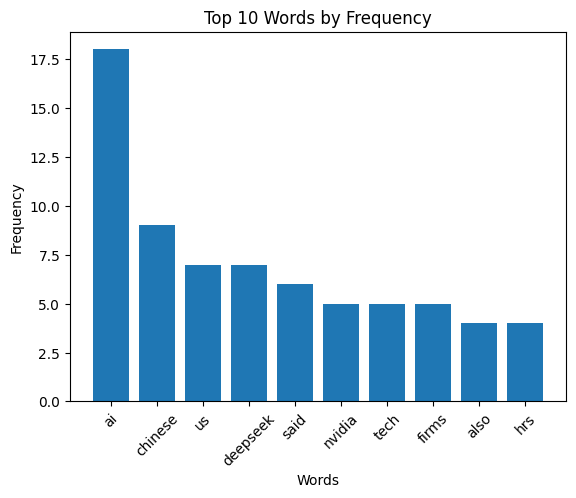

In [23]:
import matplotlib.pyplot as plt

top_words = result_df.head(10)
plt.bar(top_words['Words'], top_words['Frequencies'])
plt.title("Top 10 Words by Frequency")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [24]:
if __name__ == "__main__":
    article_url = "https://edition.cnn.com/2025/01/27/tech/deepseek-stocks-ai-china/index.html"  
    etl_pipeline = ETLPipeline(article_url)
    result_df1, polarity1, subjectivity1  = etl_pipeline.run()


Top 10 Word Frequencies:
   Words  Frequencies
     cnn           54
      ad           27
      ai           23
      us           22
   video           21
feedback           20
  market           18
    tech           17
business           13
 account           12

Extracted Topics:
Topic 1:
  cnn             0.0272
  ai              0.0148
  ad              0.0130
  video           0.0127
  us              0.0109
  market          0.0098
  tech            0.0096
  feedback        0.0079
  sign            0.0078
  stocks          0.0077
------------------------------
Topic 2:
  cnn             0.0329
  ad              0.0165
  feedback        0.0148
  us              0.0129
  market          0.0102
  video           0.0100
  tech            0.0097
  ai              0.0092
  business        0.0091
  stocks          0.0066
------------------------------
Topic 3:
  cnn             0.0235
  ai              0.0145
  ad              0.0133
  video           0.0119
  us              0.0115

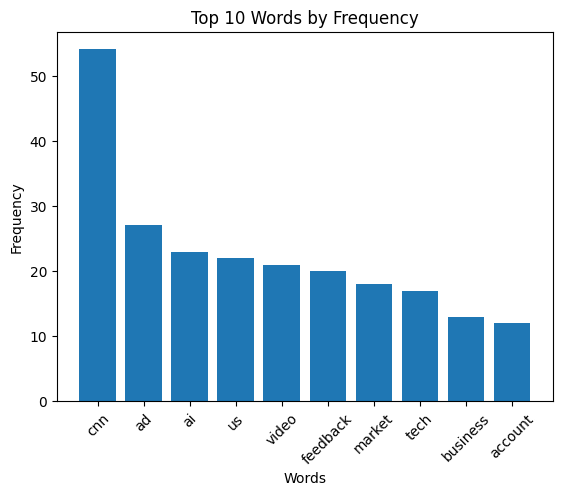

In [25]:
top_words = result_df1.head(10)
plt.bar(top_words['Words'], top_words['Frequencies'])
plt.title("Top 10 Words by Frequency")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# **Comparing Sentiment Analysis for both channels**

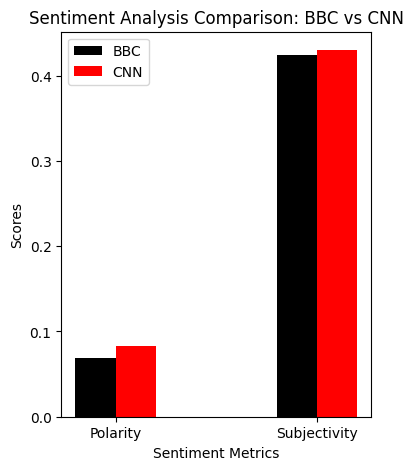

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample sentiment scores (replace with actual results)
bbc_polarity, bbc_subjectivity = ploarity, subjectivity  # BBC results
cnn_polarity, cnn_subjectivity = polarity1, subjectivity1   # CNN results

# Labels and values
labels = ["Polarity", "Subjectivity"]
bbc_values = [bbc_polarity, bbc_subjectivity]
cnn_values = [cnn_polarity, cnn_subjectivity]

# X locations for bars
x = np.arange(len(labels))  
width = 0.20  # Bar width

# Plot bars
fig, ax = plt.subplots(figsize=(4, 5))
bars1 = ax.bar(x - width/2, bbc_values, width, label="BBC", color="black")
bars2 = ax.bar(x + width/2, cnn_values, width, label="CNN", color="red")

# Labels and formatting
ax.set_xlabel("Sentiment Metrics")
ax.set_ylabel("Scores")
ax.set_title("Sentiment Analysis Comparison: BBC vs CNN")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display plot
plt.show()


**Conclusion: Sentiment Analysis of BBC vs. CNN**

The sentiment analysis results extracted through the ETL Web Pipeline and analyzed using NLP techniques reveal key insights into the reporting styles of BBC and CNN:

**Polarity**: Both news channels maintain a neutral to slightly positive tone in their articles, with CNN showing a marginally higher polarity score. This indicates that CNN’s content leans slightly more towards positive sentiment compared to BBC.

**Subjectivity**: Both BBC and CNN exhibit a relatively high subjectivity score, with CNN being slightly more subjective than BBC. This suggests that CNN's articles may contain more opinionated language or analysis compared to BBC’s more objective reporting style.

Overall, while both networks maintain a balanced sentiment, CNN appears to be slightly more opinion-driven and positive in tone compared to BBC. These insights help in understanding potential biases and variations in news reporting styles across different media sources.

** **